In [1]:
import numpy as np
import pandas as pd 
import scipy
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [5]:
df[df['bedrooms']== 33]=3

In [6]:
df[df['bedrooms']== 33]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


<AxesSubplot:>

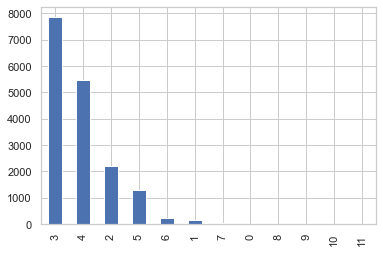

In [7]:
df['bedrooms'].value_counts().plot(kind='bar')
#This shows us the amount of homes with each room count.  Room 3 and 4 are the two most common

<AxesSubplot:>

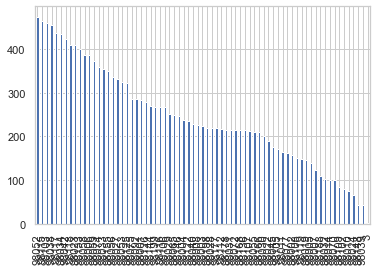

In [8]:
df['zipcode'].value_counts().plot(kind='bar')

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zipcode', ylabel='price'>

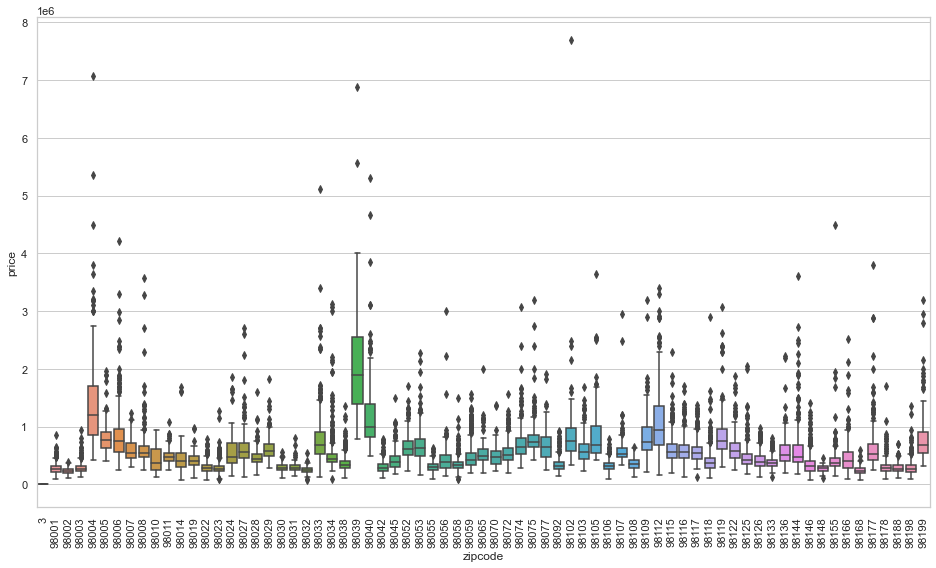

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', labelrotation = 90)
sns.boxplot(df['zipcode'],df['price'],orient='v')

In [10]:
#zip_dummies = pd.get_dummies(df['zipcode'],drop_first=True)

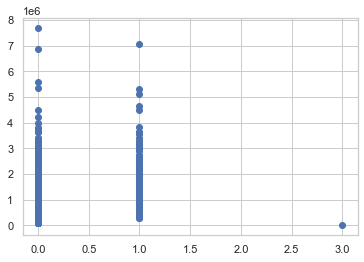

In [11]:
plt.scatter(df['waterfront'],df['price'])

In [12]:
df['yard_sqft'] = df['sqft_lot']-df['sqft_living']

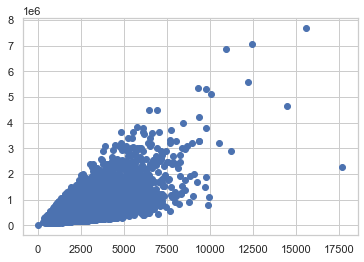

In [13]:
plt.scatter(df['sqft_living']+df['sqft_basement'],df['price'])


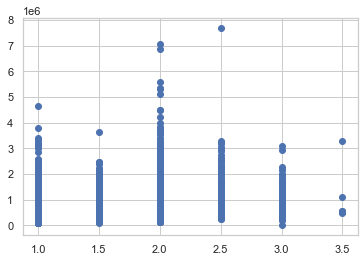

In [14]:
plt.scatter(df['floors'],df['price'])

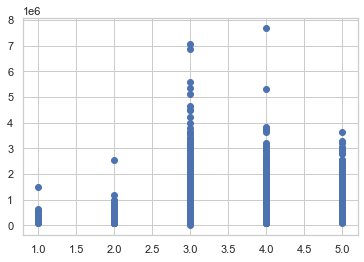

In [15]:
plt.scatter(df['condition'],df['price'])

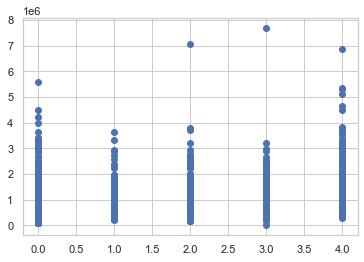

In [16]:
plt.scatter(df['view'],df['price'])

In [17]:
r1 = df[df.grade == 1].price
r3 = df[df.grade == 3].price
r4 = df[df.grade == 4].price
r5 = df[df.grade == 5].price
r6 = df[df.grade == 6].price
r7 = df[df.grade == 7].price
r8 = df[df.grade == 8].price
r9 = df[df.grade == 9].price
r10 = df[df.grade == 10].price
r11 = df[df.grade == 11].price
r12 = df[df.grade == 12].price
r13 = df[df.grade == 13].price

grade_anova = scipy.stats.f_oneway(r1,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13)
grade_anova

F_onewayResult(statistic=1764.0120660266737, pvalue=0.0)

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seattle Construction Grade on House VS House Price')

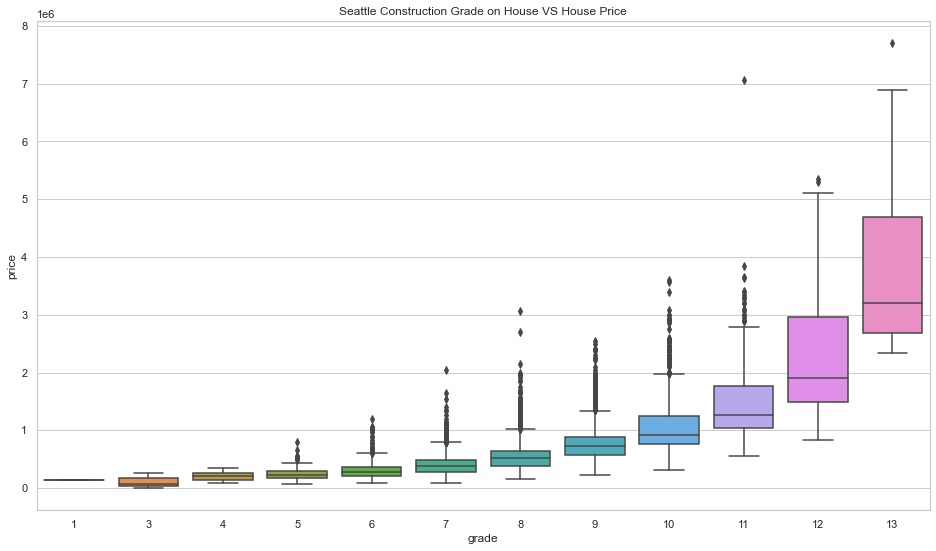

In [18]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(df['grade'],df['price'])
ax.set_title("Seattle Construction Grade on House VS House Price")

In [19]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yard_sqft
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,6823
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,3830
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,7123
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,10048
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,6720
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2700
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,8826
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,41286


In [20]:
df['bathrooms']= np.where(df['bathrooms'] == 0, 0.5, df['bathrooms'])

In [21]:
df['bathroom_avg'] = df['bedrooms']/df['bathrooms']

In [22]:
df['bed_bath_avg'] = df['bathroom_avg'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
#df['bed_bath_avg_dummies'] = pd.get_dummies(df['bed_bath_avg'],drop_first=True)

In [24]:
df['sqft_compared'] = df['sqft_living']-df['sqft_living15']

In [25]:
df['sqft_living_larger'] = df['sqft_compared'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
#df['living_larger_dummies'] = pd.get_dummies(df['sqft_living_larger'],drop_first=True)

In [27]:
#living_larger_dummies

In [28]:
#df['living_larger_dummies'].value_counts()

In [29]:
#sns.scatterplot(df['bed_bath_avg_dummies'],df['price'])

In [30]:
#sns.scatterplot(df['living_larger_dummies'],df['price'])

In [31]:
df['was_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
df['was_renovated'].value_counts()

0    16563
1      727
Name: was_renovated, dtype: int64

In [33]:
renovated_medians = df.groupby('was_renovated').median()['price']

In [34]:
renovated_medians

was_renovated
0    449000.0
1    596000.0
Name: price, dtype: float64

In [35]:
scipy.stats.ttest_ind(df[df.was_renovated == 0].price,df[df.was_renovated == 1].price)

Ttest_indResult(statistic=-15.480322391504451, pvalue=1.0801016708128817e-53)

Text(0.5, 1.0, 'Renovated vs Corresponding Median Prices')

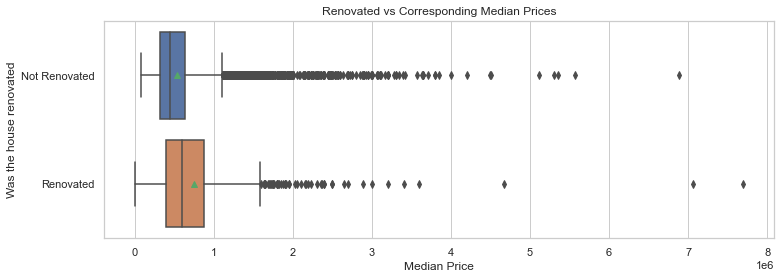

In [36]:
fig, ax = plt.subplots(figsize=(12,4))
reno_box = sns.boxplot(y='was_renovated',x='price',data=df,showmeans=True,ax=ax,orient='h')
reno_box.set(yticklabels=['Not Renovated', 'Renovated'])
ax.set_ylabel('Was the house renovated')
ax.set_xlabel('Median Price')
ax.set_title('Renovated vs Corresponding Median Prices')

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df['date'].dt.month

0        10
1         8
2         8
3         3
4         7
         ..
17285     3
17286     5
17287     5
17288    12
17289     1
Name: date, Length: 17290, dtype: int64

In [39]:
months = {1:'January', 2:'February', 3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10: 'October',11:'November',12:'December'}
df['month'] = df['date'].dt.month



In [40]:
df['month'].value_counts()

5     1928
4     1804
7     1761
6     1752
8     1561
3     1496
10    1493
9     1388
12    1170
11    1154
2      990
1      793
Name: month, dtype: int64

In [41]:
m1 = df[df.month == 1].price
m2 = df[df.month == 2].price
m3 = df[df.month == 3].price
m4 = df[df.month == 4].price
m5 = df[df.month == 5].price
m6 = df[df.month == 6].price
m7 = df[df.month == 7].price
m8 = df[df.month == 8].price
m9 = df[df.month == 9].price
m10 = df[df.month == 10].price
m11 = df[df.month == 11].price
m12 = df[df.month == 12].price

grade_anova = scipy.stats.f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)
grade_anova

F_onewayResult(statistic=2.7192916803101386, pvalue=0.0016463904594067299)

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

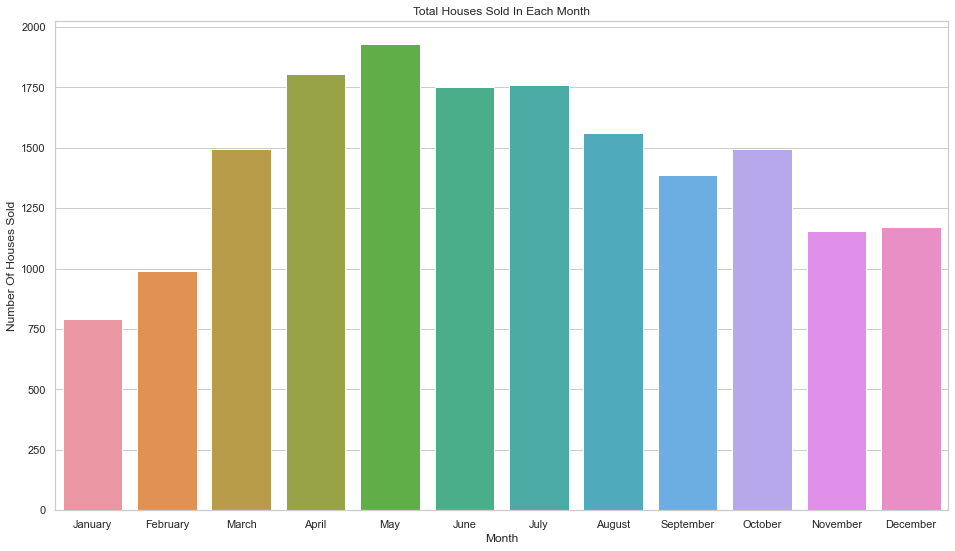

In [42]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(df['month'].value_counts().index,df['month'].value_counts().values)
ax.set_title('Total Houses Sold In Each Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number Of Houses Sold')
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])



In [43]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yard_sqft',
       'bathroom_avg', 'bed_bath_avg', 'sqft_compared', 'sqft_living_larger',
       'was_renovated', 'month'],
      dtype='object')

In [1271]:
df = pd.get_dummies(df,columns=['zipcode'],drop_first=True)
df = pd.get_dummies(df,columns=['bedrooms'],drop_first=True)
df = pd.get_dummies(df,columns=['bathrooms'],drop_first=True)
#df = pd.get_dummies(df,columns=['living_larger_dummies'],drop_first=True)
#df = pd.get_dummies(df,columns=['waterfront'],drop_first=True)
df = pd.get_dummies(df,columns=['floors'],drop_first=True)
df = pd.get_dummies(df,columns=['view'],drop_first=True)
df = pd.get_dummies(df,columns=['grade'],drop_first=True)
df = pd.get_dummies(df,columns=['month'], prefix ='month',drop_first=True)

In [44]:
#df = df.drop(columns='bed_bath_avg')
#df = df.drop(columns='bed_bath_avg_dummies')
#df = df.drop(columns='sqft_living_larger')
#df = df.drop(columns='living_larger_dummies')
#df = df.drop(columns='living_larger_dummies_1')
#df = df.drop(columns='was_renovated')
# df = df.drop(columns='condition')
df = df.drop(columns='bathroom_avg')

In [45]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yard_sqft',
       'bed_bath_avg', 'sqft_compared', 'sqft_living_larger', 'was_renovated',
       'month'],
      dtype='object')

In [46]:
df_test = df.drop(columns = ['Unnamed: 0','date','id'])

In [47]:
df_test.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
yard_sqft             0
bed_bath_avg          0
sqft_compared         0
sqft_living_larger    0
was_renovated         0
month                 0
dtype: int64

In [48]:
#all_mod = ols(formula='price~C(bedrooms)+C(zipcode)+C(waterfront)+tot_sqft+C(floors)+C(condition)+C(view)',data=df).fit()
#all_mod = ols(formula='price~zipcode+C(bedrooms)+yard_sqft+C(sqft_living_larger)+C(waterfront)+C(floors)+C(condition)+C(view)+C(grade)+C(bed_bath_avg_dummies)+C(was_renovated)+C(month)',data=df).fit()


x = df_test.drop(columns='price')
y = df_test.price
ols(formula='y~x', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1880.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:26:07   Log-Likelihood:            -2.3580e+05
No. Observations:               17290   AIC:                         4.716e+05
Df Residuals:                   17267   BIC:                         4.718e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.895e+06   3.29e+06      1.184      0.237   -2.55e+06    1.03e+07
x[0]       -3.733e+04   2218.040    -16.829      0.000   -4.17e+04    -3.3e+04
x[1]        4.006e+04   3677.589     10.894      0.000    3.29e+04    4.73e+04
x[2]       -4.294e+04   5.73e+05     -0.075      0.940   -1.17e+06    1.08e+06
x[3]       -2.147e+04   2.86e+05     -0.075      0.940   -5.83e+05     5.4e+05
x[4]        8639.4066   4054.868      2.131      0.033     691.455    1.66e+04
x[5]        5.959e+05   1.91e+04     31.199      0.000    5.58e+05    6.33e+05
x[6]         5.09e+04   2389.960     21.297      0.000    4.62e+04    5.56e+04
x[7]        2.952e+04   2646.485     11.155      0.000    2.43e+04    3.47e+04
x[8]        9.143e+04   2441.988     37.440      0.000    8.66e+04    9.62e+04
x[9]         8.61e+04   1.15e+06      0.075      0.940   -2.16e+06    2.33e+06
x[10]       8.607e+04   1.15e+06      0.075      0.940   -2.16e+06    2.33e+06
x[11]      -2680.9454     81.644    -32.837      0.000   -2840.976   -2520.915
x[12]       3812.3980    485.019      7.860      0.000    2861.712    4763.084
x[13]       -560.9152     37.097    -15.120      0.000    -633.630    -488.201
x[14]       5.994e+05   1.21e+04     49.566      0.000    5.76e+05    6.23e+05
x[15]      -2.234e+05   1.47e+04    -15.182      0.000   -2.52e+05   -1.95e+05
x[16]      -2.147e+04   2.86e+05     -0.075      0.940   -5.83e+05     5.4e+05
x[17]         -0.3279      0.081     -4.051      0.000      -0.487      -0.169
x[18]       2.147e+04   2.86e+05      0.075      0.940    -5.4e+05    5.83e+05
x[19]      -4.515e+04   5.91e+04     -0.764      0.445   -1.61e+05    7.08e+04
x[20]      -2.146e+04   2.86e+05     -0.075      0.940   -5.83e+05     5.4e+05
x[21]      -7.207e+04   4230.397    -17.036      0.000   -8.04e+04   -6.38e+04
x[22]      -7.573e+06   9.68e+05     -7.823      0.000   -9.47e+06   -5.68e+06
x[23]      -2748.9672    495.263     -5.551      0.000   -3719.732   -1778.202
==============================================================================
Omnibus:                    14424.347   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1360146.353
Skew:                           3.473   Prob(JB):                         0.00
Kurtosis:                      45.892   Cond. No.                     1.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
#all_mod_summ = all_mod.summary()

In [50]:
#all_mod_summ

In [53]:
df.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yard_sqft,bed_bath_avg,sqft_compared,sqft_living_larger,was_renovated,month
Unnamed: 0,1.000000,-0.005979,-0.012159,-0.010521,-0.005191,-0.008673,-0.003464,0.010315,-0.011830,-0.000357,-0.001717,-0.004616,-0.003190,-0.012037,0.012658,-0.003403,0.013577,0.013122,-0.014047,-0.008669,0.000510,-0.003286,0.009711,-0.003385,-0.001252,-0.003897,0.003317
id,-0.005979,1.000000,-0.015497,-0.000123,0.003651,-0.014063,-0.129806,0.016824,-0.002898,0.012248,-0.014109,0.003501,-0.013771,-0.003428,0.017657,-0.019550,0.011463,0.010491,-0.009409,-0.007267,-0.139566,-0.129941,0.003133,-0.013198,-0.003466,-0.019977,-0.014686
price,-0.012159,-0.015497,1.000000,0.313797,0.524552,0.703597,0.086831,0.256697,0.264439,0.395024,0.036118,0.666220,0.607851,0.323337,0.055301,0.117783,0.007476,0.124525,-0.008066,0.585664,0.081462,0.071772,0.007676,0.408200,0.223095,0.116928,-0.004197
bedrooms,-0.010521,-0.000123,0.313797,1.000000,0.523330,0.588495,0.030677,0.179784,-0.009166,0.082603,0.021452,0.366322,0.488395,0.307903,0.143866,0.014489,-0.007871,0.001361,0.015901,0.401032,0.028042,0.017938,0.097414,0.442268,0.370874,0.014055,0.003023
bathrooms,-0.005191,0.003651,0.524552,0.523330,1.000000,0.755453,0.085510,0.498623,0.065983,0.189210,-0.123302,0.663814,0.687113,0.282673,0.448743,0.048091,-0.023210,0.000612,0.041125,0.568171,0.086571,0.069314,0.033080,0.507152,0.341731,0.047871,0.012802
sqft_living,-0.008673,-0.014063,0.703597,0.588495,0.755453,1.000000,0.166827,0.356654,0.102044,0.282719,-0.061379,0.762984,0.876731,0.435572,0.292278,0.051461,0.003094,0.035817,0.017304,0.755147,0.179597,0.145571,0.008637,0.667854,0.470401,0.050488,0.017961
sqft_lot,-0.003464,-0.129806,0.086831,0.030677,0.085510,0.166827,1.000000,-0.002274,0.014198,0.072954,-0.013673,0.110346,0.180768,0.008087,0.049544,0.004521,-0.006342,-0.028475,0.030386,0.136977,0.701877,0.999768,-0.006575,0.098928,0.046078,0.004503,-0.001687
floors,0.010315,0.016824,0.256697,0.179784,0.498623,0.356654,-0.002274,1.000000,0.029616,0.026429,-0.259193,0.458015,0.527947,-0.247503,0.421063,0.005940,-0.025584,-0.001468,0.039907,0.283294,-0.008261,-0.010066,-0.026952,0.222335,0.129663,0.006661,0.019324
waterfront,-0.011830,-0.002898,0.264439,-0.009166,0.065983,0.102044,0.014198,0.029616,1.000000,0.401424,0.008140,0.081854,0.070685,0.079606,-0.131532,0.090948,-0.244723,-0.234231,0.239017,0.082766,0.025165,0.012019,0.002340,0.061669,0.021523,0.100629,0.002140
view,-0.000357,0.012248,0.395024,0.082603,0.189210,0.282719,0.072954,0.026429,0.401424,1.000000,0.044965,0.248527,0.164209,0.279714,-0.056480,0.091213,-0.020598,-0.023620,0.015440,0.279223,0.073055,0.067032,-0.003216,0.114190,0.062950,0.092334,-0.004558


In [ ]:
print(df.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=9,test_size=0.2)

In [ ]:
lm = LinearRegression()

In [ ]:
lm = lm.fit(X_train, y_train)

In [ ]:
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

In [ ]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

In [ ]:
df['price'].std()

In [ ]:
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)

In [ ]:
test_mae/df['price'].std()

In [ ]:
test_rmse/df['price'].std()

In [ ]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7,  scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 

selector.fit(X_train, y_train)


In [ ]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [ ]:
len(selected_rfe)

In [ ]:
selected_rfe

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

In [ ]:
#your code here 
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])


In [1273]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rfe))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Training Root Mean Squared Error:' , train_rmse)
print('Training Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 149035.2505920824
Training Root Mean Squared Error: 145711.71932175674


In [1274]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df[selected_rfe], df['price'])

KeyError: "['bedrooms_33'] not in index"

In [1159]:
len(selected_rfe)

7

In [1160]:
len(lm.coef_)

7